In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing dataset
df = pd.read_csv('/content/student_scores.csv')

In [3]:
# checking first five rows of our dataset
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking the shape of our dataset
df.shape

(25, 2)

In [5]:
# so we have 25 rows and two columns
# checking the statistical information of our dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# getting summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


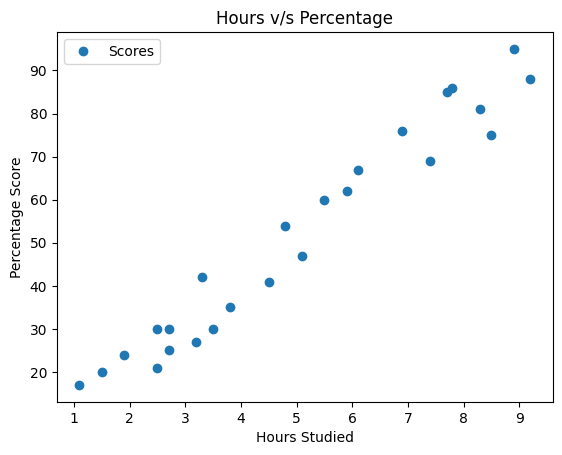

In [7]:
# so we can see their no null valuue in our dataset
# lets plot our data on 2d graph
# Plotting graph using matplotlib library
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
# From the above graph, we can clearly see that there is a positive linear relation between the no. of hours studied and percentage of score.
# The bias is high, hence the data should be split into train and test splits.

In [9]:
# now we need our input data and output data
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [10]:
# above we have used values in iloc so that it will be converted to numpy array rather than pandas series
# NumPy arrays (x and y in Snippet 1) are more commonly used when training machine learning models because scikit-learn and other libraries typically expect NumPy arrays (or similar structures like matrices).
# Pandas Series (x and y in Snippet 2) are perfectly fine for exploration and analysis within pandas, but many machine learning models require 2D arrays (even if you only have one feature) for X, and 1D arrays for y.

In [11]:
x

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [12]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [13]:
# now we will split our data into test and train set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
# if you wont reshape then it will give you error
# ValueError: Expected 2D array, got 1D array instead:
# array=[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
#  8.9 4.5].
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
Xtrain = Xtrain.reshape(-1,1)
Xtest = Xtest.reshape(-1,1)

In [15]:
# now we will be using linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression()

In [16]:
# Predict on the test set
y_pred = model.predict(Xtest)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print('Mean Squared Error: ',mse)
print('R-squared: ',r2)

Mean Squared Error:  21.598769307217456
R-squared:  0.9454906892105354


In [18]:
# Plotting the regression line
line= model.coef_*x+model.intercept_ # y=mx+c where m is slope and c is intercept

In [19]:
line

array([26.79480124, 52.56250809, 33.73226078, 86.25874013, 36.70545772,
       16.88414476, 93.19619966, 56.52677068, 84.27660883, 28.77693254,
       78.33021494, 60.49103328, 46.6161142 , 34.72332643, 12.91988217,
       90.22300272, 26.79480124, 20.84840735, 62.47316457, 75.357018  ,
       28.77693254, 49.58931115, 39.67865467, 70.40168976, 79.32128059])

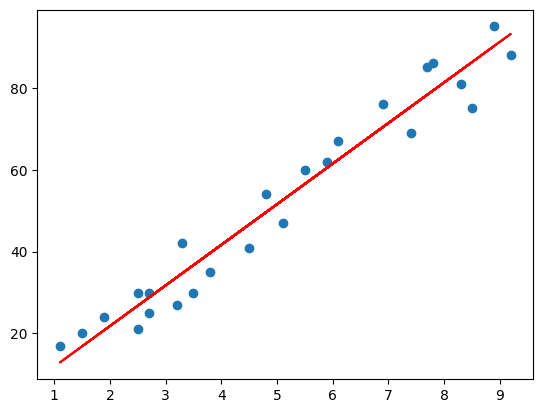

In [20]:
# Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color="red")
plt.show()

In [21]:
df1 = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
# Testing with our own data
hours1=9.25
hours2=3.00
new_pred=model.predict([[hours1],[hours2]])
print("No. of Hours = ",hours1," ",hours2)
print("Predicted Score = ",new_pred[0]," ",new_pred[1])

No. of Hours =  9.25   3.0
Predicted Score =  93.69173248737539   31.750129483361384


In [23]:
# Verifying the prediction of model

In [24]:
model.coef_

array([9.91065648])

In [25]:
model.intercept_

2.018160041434662

In [26]:
# Checking with the Slope of a line formula
# y= m * x + b

y=9.91065648 * 9.25 + 2.018160041434662
y

93.69173248143466

In [27]:
# Now we can see that predicted value is 93.69 & we also verify that predicted value as y=m*X+b, and got the same value